FINANCIAL PROJECT
The intended purpose of this project is to provide a website that provides historical and current sentiment of a stock.Historical data was obtained using quandl, and sentiment was provided using tweepy.

In [13]:
!pip install quandl


    100% |████████████████████████████████| 51kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 4.8MB/s ta 0:00:011
  Running setup.py bdist_wheel for inflection ... done
  Stored in directory: /Users/yg/Library/Caches/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


Enter the stock symbol, ex. AAPL:AAPL
AAPL
            adj_close
ticker           AAPL
date                 
2010-01-04  27.503268
2010-01-05  27.550818
2010-01-06  27.112585
2010-01-07  27.062465
2010-01-08  27.242385


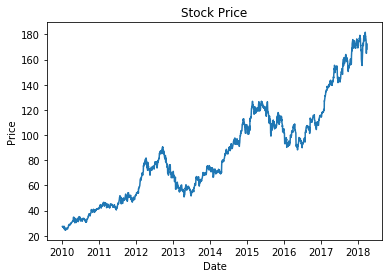

In [32]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt


# add quandl API key for unrestricted
quandl.ApiConfig.api_key = "k1EtVykRfH4sT51tD55b"
stockSymbol = raw_input ('Enter the stock symbol, ex. AAPL:')
print stockSymbol

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call
data = quandl.get_table('WIKI/PRICES', ticker = [stockSymbol], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2010-01-01', 'lte': '2018-05-18' }, 
                        paginate=True)

# create a new dataframe with 'date' column as index
new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')
print clean_data.head()


plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(clean_data)
plt.show()

In [ ]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def twitter_setup():
    access_token = "869029163621011456-O6WTJ8f69lgS2QbKmSKaaArrH7B85gv"
    access_token_secret = "8PBcVbEnbzwZYkcio54UAfPjtHt8DPefhGu8g1MCqRETf"
    consumer_key = "YNbbzwptxB8rvd0rbHIFywaO3"
    consumer_secret = "Yxrt25DaGSmLyfqowfc9kjY3YTY6feJJ7igmzHro3EIHOTnH9g"
 
    # Authentication and access using keys:
    auth = OAuthHandler("YNbbzwptxB8rvd0rbHIFywaO3","Yxrt25DaGSmLyfqowfc9kjY3YTY6feJJ7igmzHro3EIHOTnH9g" )
    auth.set_access_token("869029163621011456-O6WTJ8f69lgS2QbKmSKaaArrH7B85gv", "8PBcVbEnbzwZYkcio54UAfPjtHt8DPefhGu8g1MCqRETf")
    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [24]:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="AAPL", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("10 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

10 recent tweets:

$438.71 (--0.18)
()
$440.30 (+1.41)
()
$440.90 (+2.01)
()
$435.40 (--3.49)
()
$438.89 (0.00)
()


In [29]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,$438.71 (--0.18),16,344544579560816641,2013-06-11 20:00:03,stckr,2,3,0
1,$440.30 (+1.41),15,344514379829620736,2013-06-11 18:00:03,stckr,2,1,0
2,$440.90 (+2.01),15,344484180182327297,2013-06-11 16:00:03,stckr,1,1,0
3,$435.40 (--3.49),16,344453987040378880,2013-06-11 14:00:04,stckr,1,0,0
4,$438.89 (0.00),14,344438895540322304,2013-06-11 13:00:06,stckr,0,0,0
5,$439.80 (--2.01),16,344182189614845952,2013-06-10 20:00:03,stckr,0,0,0
6,$447.16 (+5.35),15,344151995264937985,2013-06-10 18:00:04,stckr,0,0,0
7,$447.01 (+5.20),15,344121792597733376,2013-06-10 16:00:03,stckr,1,0,0
8,$445.91 (+4.10),15,344091612567187458,2013-06-10 14:00:08,stckr,0,0,0
9,$441.81 (0.00),14,344076497209929728,2013-06-10 13:00:04,stckr,0,0,0


In [30]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 0%
Percentage of neutral tweets: 100%
Percentage de negative tweets: 0%
